In [35]:
#Dataset-Titnic
#ուղեվորի փրկվելու կանխատեսում
#մեթոդ classification


# Անհրաժեշտ փաթեթների ներմուծում
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Տվյալները վերցնում ենք պատրաստի աղբյուրից՝ .csv ֆայլով
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Ցուցադրում ենք առաջին 5 տողերը
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
#shape ցույց է տալիս՝ քանի տող և քանի սյունակ կա։
print("Տողերի քանակը:", df.shape[0])
print("Սյունակների քանակը:", df.shape[1])


Տողերի քանակը: 891
Սյունակների քանակը: 12


In [37]:
# Սյունակների տիպերը
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [38]:
# Վիճակագրական ամփոփում,տեսնում ենք միջին արժեքներ, մաքսիմում, մինիմում, սանդղակներ (percentiles) և այլ
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [39]:
# Ստուգում ենք բաց արժեքները
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [40]:
#Այս քայլերով մենք «լավացնում ենք» տվյալները՝ լցնելով բաց դաշտերը կամ ջնջելով սյունակները։Օրինակ՝ «Age» ,«Cabin»։
# Լրացնում ենք բաց արժեքները միջինով կամ ամենատարածված արժեքով
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# «Cabin» սյունակը շատ բաց արժեքներ ունի, հեռացնում ենք
df.drop(columns=['Cabin'], inplace=True)




/tmp/ipython-input-40-2246087530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-40-2246087530.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [41]:
# Մեքենայական ուսուցումը չի կարող աշխատել բառերի հետ։ Օրինակ՝ «male», «female» փոխում ենք 0 և 1։
# Տեքստային սյունակները պետք է վերածենք թվերի
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Հեռացնում ենք անհարմար սյունակները
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


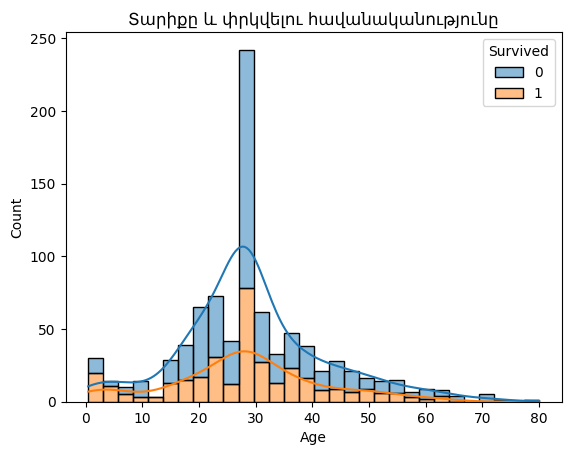

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple="stack")
plt.title("Տարիքը և փրկվելու հավանականությունը")
plt.show()
#Տեսնում ենք, որ երիտասարդները ավելի շատ են փրկվել։

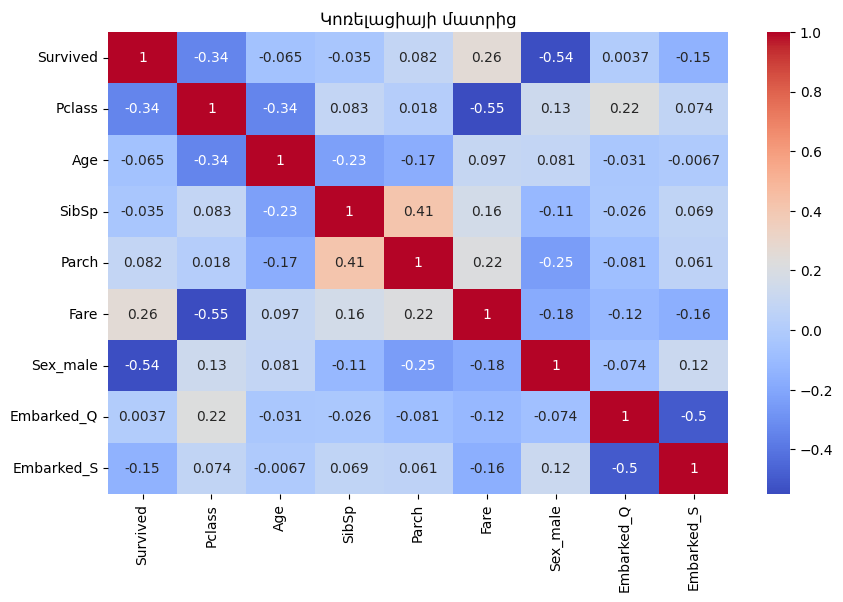

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Կոռելացիայի մատրից")
plt.show()
#Այս պատկերում նայում ենք՝ որ սյունակներն են կապված միմյանց հետ։
#Օրինակ՝ «Sex_male» և «Survived» ունեն բացասական կոռելացիա՝ այսինքն տղամարդիկ ավելի քիչ են փրկվել։


In [48]:
#սահմանենք կախյալ ու անախ փոփոխականները
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)  # անկախ փոփոխականներ
y = df['Survived']               # կախյալ փոփոխական

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Յուրաքանչյուր գործակից ցույց է տալիս, թե տվյալ սյունակը որքանով ազդում է «փրկվելու» հավանականության վրա։
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")

print("Ազատ անդամ:", model.intercept_[0])





Pclass: -0.937
Age: -0.031
SibSp: -0.295
Parch: -0.108
Fare: 0.003
Sex_male: -2.592
Embarked_Q: -0.113
Embarked_S: -0.398
Ազատ անդամ: 4.529517191272281


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))



Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432


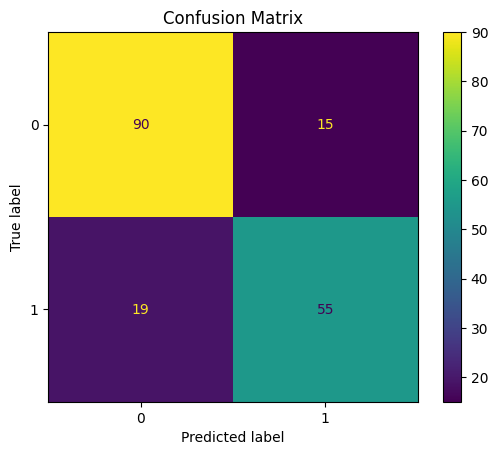

In [50]:
# Շփոթեցնող մատրից
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
